In [233]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [234]:
transform = transforms.ToTensor()

In [235]:
train_data = datasets.MNIST(root='cnn_data', train=True, download=True, transform=transform)

In [236]:
test_data  = datasets.MNIST(root='cnn_data', train=False, download=False, transform=transform)

In [237]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [238]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [239]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [240]:
X_train.shape

torch.Size([1, 28, 28])

In [241]:
x = X_train.view(1,1,28,28)

In [242]:
x = F.relu(conv1(x))

In [243]:
x.shape

torch.Size([1, 6, 26, 26])

In [244]:
x = F.max_pool2d(x,2,2)

In [245]:
x.shape

torch.Size([1, 6, 13, 13])

In [246]:
x = F.relu(conv2(x))

In [247]:
x.shape

torch.Size([1, 16, 11, 11])

In [248]:
x = F.max_pool2d(x,2,2)

In [249]:
x.shape

torch.Size([1, 16, 5, 5])

In [250]:
x

tensor([[[[0.0000, 0.0000, 0.0012, 0.0024, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0246, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0369, 0.0303, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0752, 0.1039],
          [0.0000, 0.1030, 0.1474, 0.1624, 0.1317],
          [0.0000, 0.0000, 0.1329, 0.2307, 0.0000],
          [0.0000, 0.0000, 0.0196, 0.1264, 0.1706],
          [0.0000, 0.0318, 0.1310, 0.1242, 0.0986]],

         [[0.1091, 0.0484, 0.0000, 0.0000, 0.1212],
          [0.1188, 0.1861, 0.0491, 0.1217, 0.1554],
          [0.1056, 0.1501, 0.1396, 0.0105, 0.1056],
          [0.1113, 0.1043, 0.1955, 0.0000, 0.1172],
          [0.0826, 0.0000, 0.1001, 0.1321, 0.1533]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0711, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0217, 0.0000, 0.0000],
      

In [251]:
class ConvolutionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim = 1)
        return x



In [252]:
torch.manual_seed(41)
model = ConvolutionNetwork()
model 

ConvolutionNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [253]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [254]:
import time
start_time = time.time()




epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


for i in range(epochs):
    trn_correct = 0
    tst_correct = 0
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted==y_train).sum()
        trn_correct += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600==0:
            print(f'Epoch: {i}, Batch: {b}, Loss: {loss.item()}')
    train_losses.append(loss)
    train_correct.append(trn_correct)



with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
        y_val = model(X_test)
        predicted = torch.max(y_val.data, 1)[1]
        tst_correct += (predicted == y_test).sum()
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_correct)
    




current_time = time.time()
total_time = current_time - start_time
print(total_time)

Epoch: 0, Batch: 600, Loss: 0.1623610556125641
Epoch: 0, Batch: 1200, Loss: 0.16145507991313934
Epoch: 0, Batch: 1800, Loss: 0.5041674375534058
Epoch: 0, Batch: 2400, Loss: 0.13252843916416168
Epoch: 0, Batch: 3000, Loss: 0.00878168549388647
Epoch: 0, Batch: 3600, Loss: 0.32324641942977905
Epoch: 0, Batch: 4200, Loss: 0.003371942788362503
Epoch: 0, Batch: 4800, Loss: 0.0016954930033534765
Epoch: 0, Batch: 5400, Loss: 0.08084886521100998
Epoch: 0, Batch: 6000, Loss: 0.0004548938886728138
Epoch: 1, Batch: 600, Loss: 0.0020878887735307217
Epoch: 1, Batch: 1200, Loss: 0.014557531103491783
Epoch: 1, Batch: 1800, Loss: 0.050593696534633636
Epoch: 1, Batch: 2400, Loss: 0.027636203914880753
Epoch: 1, Batch: 3000, Loss: 0.0006187607650645077
Epoch: 1, Batch: 3600, Loss: 0.004728333558887243
Epoch: 1, Batch: 4200, Loss: 0.3600306212902069
Epoch: 1, Batch: 4800, Loss: 0.019257554784417152
Epoch: 1, Batch: 5400, Loss: 0.00976379495114088
Epoch: 1, Batch: 6000, Loss: 0.000219882043893449
Epoch: 2, 

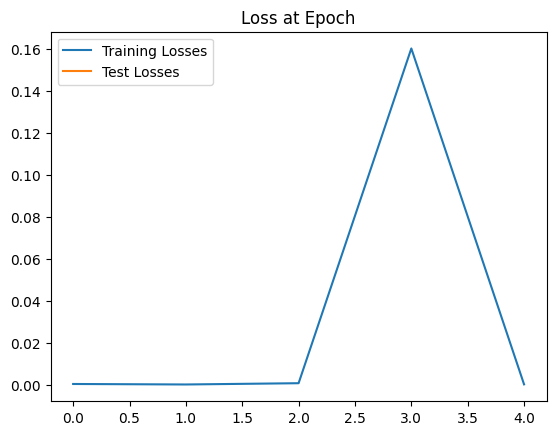

In [255]:
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label = "Training Losses")
plt.plot(test_losses, label = "Test Losses")
plt.title("Loss at Epoch")
plt.legend()